<a href="https://colab.research.google.com/github/MarinaSokolova111/OPDA/blob/main/%D0%9E%D0%9F%D0%94%D0%90_4_3(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case study 3: Worldwide COVID-19 cases – an analysis**

Вопросы, на которые необходимо ответить с помощью анализа, включают:
  1. В каких странах самый низкий уровень смертности, максимум случаев и больше всего погибших?
  2. Какова месячная тенденция по количеству случаев и погибших с начала пандемии?
  3. В некоторых странах были введены ограничения, чтобы помочь сгладить кривую. Помогла ли эта мера снизить количество заболевших?

In [ ]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Шаг 1.** Импорт данных и изучение характеристик набора данных

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving COVID-19-geographic-disbtribution-worldwide-2020-06-29.xlsx to COVID-19-geographic-disbtribution-worldwide-2020-06-29 (1).xlsx


Прочтите набор данных и изучите первые пять строк (используя метод head) с помощью файла ***pd.read_excel***:

In [ ]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide-2020-06-29 (1).xlsx')
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
0,2020-06-29,29,6,2020,351,18,Afghanistan,AF,AFG,38041757.0,Asia
1,2020-06-28,28,6,2020,165,20,Afghanistan,AF,AFG,38041757.0,Asia
2,2020-06-27,27,6,2020,276,8,Afghanistan,AF,AFG,38041757.0,Asia
3,2020-06-26,26,6,2020,460,36,Afghanistan,AF,AFG,38041757.0,Asia
4,2020-06-25,25,6,2020,234,21,Afghanistan,AF,AFG,38041757.0,Asia


Получите информацию о типе данных каждого столбца и количестве ненулевых значений в каждом столбце (используя метод **info**).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26562 entries, 0 to 26561
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dateRep                  26562 non-null  datetime64[ns]
 1   day                      26562 non-null  int64         
 2   month                    26562 non-null  int64         
 3   year                     26562 non-null  int64         
 4   cases                    26562 non-null  int64         
 5   deaths                   26562 non-null  int64         
 6   countriesAndTerritories  26562 non-null  object        
 7   geoId                    26455 non-null  object        
 8   countryterritoryCode     26498 non-null  object        
 9   popData2019              26498 non-null  float64       
 10  continentExp             26562 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 2.2+ MB


Получите сводную статистику для каждого столбца (используя метод описания) и получите значения **count, min, max, стандартное отклонение и процентиль**:

In [ ]:
df.describe()

,day,month,year,cases,deaths,popData2019
count,26562.000000,26562.000000,26562.000000,26562.000000,26562.000000,2.649800e+04
mean,16.207929,4.194790,2019.997478,380.722611,18.882690,4.689196e+07
std,8.745421,1.555569,0.050161,2172.430663,121.386696,1.675462e+08
min,1.000000,1.000000,2019.000000,-2461.000000,-1918.000000,8.150000e+02
25%,9.000000,3.000000,2020.000000,0.000000,0.000000,1.919968e+06
50%,17.000000,4.000000,2020.000000,4.000000,0.000000,8.776119e+06
75%,24.000000,5.000000,2020.000000,68.000000,1.000000,3.194979e+07
max,31.000000,12.000000,2020.000000,54771.000000,4928.000000,1.433784e+09


# **Шаг 2. Обработка данных**

На этом этапе выполним:
• Проверку: правильно ли определены типы данных столбцов. Если нет, изменить типы данных: из вывода информационного метода мы видим, что все типы данных столбцов были правильно идентифицированы.
• При необходимости переименовать столбцы: в следующем коде переименовываем столбцы DataFrame.

In [ ]:
df.columns=['date','day', 'month', 'year', 'cases', 'deaths', 'country', 'old_country_code', 'country_code', 'population', 'continent']

Отбросьте ненужные столбцы или строки:
• Мы видим, что столбец кода страны присутствует дважды (с двумя разными именами: **'old_country_code'** и **'country_code'**) в DataFrame, поэтому мы удаляем один из столбцов («**old_country_code**»):

In [ ]:
df.drop(['old_country_code'], axis=1, inplace=True)

Удалить все лишние данные, которые не добавляют никакой ценности:
В этом DataFrame нет пробелов, специальных символов или любых других посторонних символов. Мы видим, что есть данные только за один день декабря 2019 года; поэтому мы удаляем данные за этот месяц и создаем новый DataFrame (df1) на оставшиеся 11 месяцев.

In [ ]:
df1=df[df.month!=12]

Проверьте, есть ли какие-либо нулевые значения, используя метод **isna** или **isnull**, и примените соответствующие методы для работы с ними, если они есть:
Расчет процента нулевых значений:

In [ ]:
#Если получается число, не равное нулю, значит есть ненужные пустые значения 
df1.isna().sum().sum()/len(df1)

0.0047556142668428005

Поскольку процент нулевых значений меньше **1%**, мы отбрасываем нулевые значения на следующем шаге, т.к. это удовлектровяется всем гипотизам теории вероятности(нулевой, первой, второй)

In [ ]:
df1.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df1

,date,day,month,year,cases,deaths,country,country_code,population,continent
0,2020-06-29,29,6,2020,351,18,Afghanistan,AFG,38041757.0,Asia
1,2020-06-28,28,6,2020,165,20,Afghanistan,AFG,38041757.0,Asia
2,2020-06-27,27,6,2020,276,8,Afghanistan,AFG,38041757.0,Asia
3,2020-06-26,26,6,2020,460,36,Afghanistan,AFG,38041757.0,Asia
4,2020-06-25,25,6,2020,234,21,Afghanistan,AFG,38041757.0,Asia
...,...,...,...,...,...,...,...,...,...,...
26557,2020-03-25,25,3,2020,0,0,Zimbabwe,ZWE,14645473.0,Africa
26558,2020-03-24,24,3,2020,0,1,Zimbabwe,ZWE,14645473.0,Africa
26559,2020-03-23,23,3,2020,0,0,Zimbabwe,ZWE,14645473.0,Africa
26560,2020-03-22,22,3,2020,1,0,Zimbabwe,ZWE,14645473.0,Africa


In [ ]:
df1.isna().sum().sum()/len(df1)

0.0

**Агрегируем данные**,

если данные находятся в этом формате формате: данные в этом DataFrame не в агрегированном формате, и мы преобразуем их в этот формат с помощью метода **groupby** на этом этапе. Мы можем группировать по странам, континентам или по дате. Сгруппируем по названию страны.

In [ ]:
df_by_country = df1.groupby('country')['cases', 'deaths'].sum()
df_by_country

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,cases,deaths
country,,
Afghanistan,30967,721
Albania,2402,55
Algeria,13273,897
Andorra,855,52
Angola,267,11
...,...,...
Vietnam,355,0
Western_Sahara,208,1
Yemen,1118,302


Предыдущие выходные данные показывают консолидированную картину количества случаев заболевания и смертей по каждой стране.

Давайте добавим еще один столбец в этот агрегированный DataFrame - коэффициент смертности, который представляет собой отношение количества смертей к количеству случаев.

In [ ]:
df_by_country['mortality_rate']=df_by_country['deaths']/df_by_country['cases']
df_by_country

,cases,deaths,mortality_rate
country,,,
Afghanistan,30967,721,0.023283
Albania,2402,55,0.022898
Algeria,13273,897,0.067581
Andorra,855,52,0.060819
Angola,267,11,0.041199
...,...,...,...
Vietnam,355,0,0.000000
Western_Sahara,208,1,0.004808
Yemen,1118,302,0.270125


# **Шаг 3: Визуализация данных**

В  первой визуализации этого исследования используем агрегированные данные в DataFrame, «**df_by_country**», для отображения двадцати стран с наибольшим уровнем смертности. 

Text(0.5, 1.0, 'Countries with highest mortality rates')

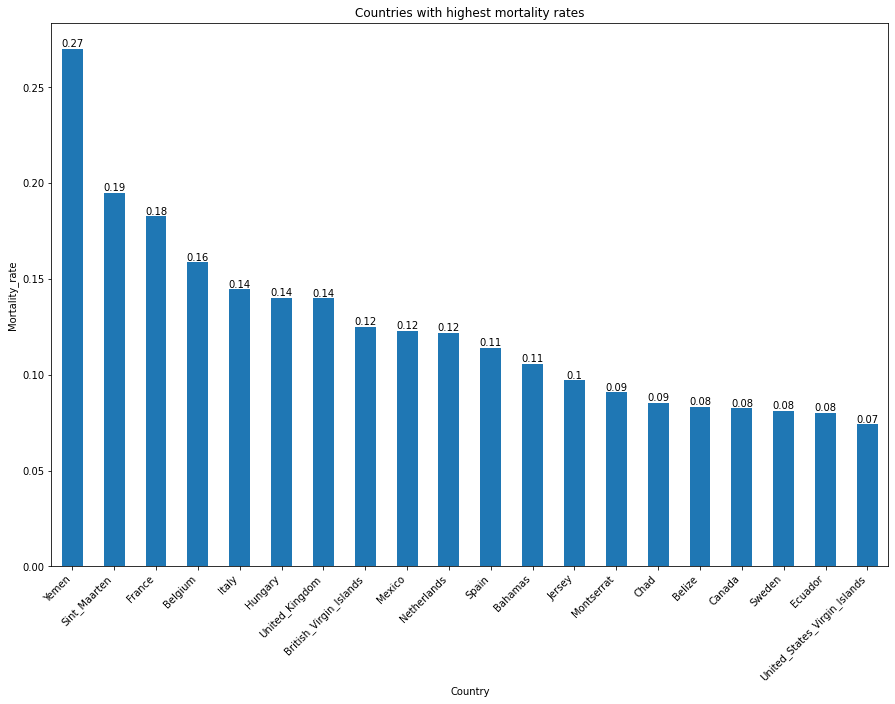

In [ ]:
plt.figure(figsize=(15, 10))
ax=df_by_country['mortality_rate'].sort_values(ascending=False).head(20).plot(kind='bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(p.get_height().round(2), (p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='bottom')
ax.set_xlabel('Country')
ax.set_ylabel('Mortality_rate')
ax.set_title('Countries with highest mortality rates')

Во второй визуализации мы отображаем десять стран с наибольшим количеством случаев COVID-19, используя круговую диаграмму, как показано на рисунке ниже.

Text(0.5, 1.0, 'Top ten countries by case load')

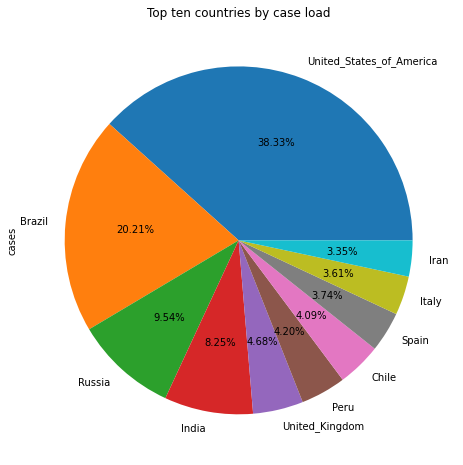

In [ ]:
df_cases=df_by_country['cases'].sort_values(ascending=False)
ax=df_cases.head(10).plot(kind='pie', autopct='%.2f%%', labels=df_cases.index, figsize=(12,8))
ax.set_title('Top ten countries by case load')

В следующей визуализации с помощью гистограммы выясняем пять стран, которые больше всего пострадали с точки зрения человеческих потерь в результате пандемии COVID-19.

Text(0, 0.5, 'Number of deaths')

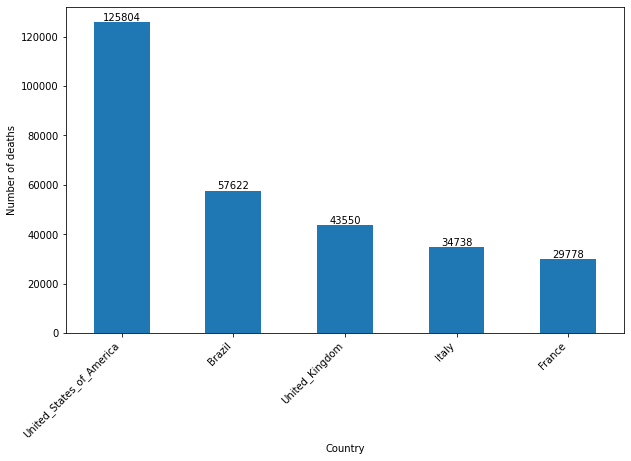

In [ ]:
plt.figure(figsize=(10,5))

ax=sns.barplot(x='Film',y='Gross',data=df1.head(5))
ax.set_xticklabels(labels=df1.head()['Film'],rotation=75)
ax.set_title("Top 5 Films per revenue")
ax.set_ylabel("Gross revenue")

for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='bottom')

Теперь  построим линейные графики, чтобы увидеть ежемесячный тренд числа случаев COVID-19 и смертельных исходов.
Чтобы построить линейные графики, мы сначала агрегируем данные по месяцам, а затем строим два линейных графика рядом, показывая количество случаев заболевания и смертей, как показано на рисунке ниже.

In [ ]:
df_by_month=df1.groupby('month')['cases', 'deaths'].sum()
fig=plt.figure(figsize=(15, 10))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_sub

Многие страны ввели локдаун, чтобы остановить волну увеличения числа случаев заболевания. Теперь мы посмотрим на четыре страны - Индию, Великобританию, Италию и Германию - где в марте были введены ограничения, чтобы увидеть, оказала ли эта мера желаемый эффект.
Сначала мы создаем объекты DataFrame для каждой из этих стран с агрегированными данными по месяцам.

In [ ]:
#Ваш код


Теперь  используем объекты DataFrame, созданные на предыдущих шагах, для построения линейных графиков для этих стран, чтобы увидеть количество случаев в разные месяцы в 2020 году, как показано на рисунке ниже. 

In [ ]:
#Ваш код

# **Шаг 4:** Построение выводов на основе анализа и визуализаций

Количество случаев: наибольшее количество случаев зарегистрировано в США, Бразилии, России, Индии и Великобритании.
• Количество смертей: США, Бразилия, Великобритания, Италия и Франция имели самые высокие показатели смертности. Уровень смертности: Йемен, Сен-Мартен, Франция, Бельгия и Италия имели самые высокие показатели смертности.
• Тенденции:
• Общее количество заболевших неуклонно растет, в то время как общее количество смертей (смертей) снизилось после Апреля.
• Влияние локдауна: мы проанализировали четыре страны - Индию, Великобританию, Германию и Италию - где в марте были введенлокдаун. За исключением Индии, во всех этих странах наблюдалось общее снижение числа случаев после введения карантина. В Великобритании и Германии число случаев заболевания сначала увеличилось (на ранней стадии закрытия стран), но после этого всплеска стало снижаться.

# **Задание 1**

Рассмотрим первую таблицу на следующей веб-странице: https://en.wikipedia.org/wiki/Climate_of_South_Africa. Она содержит данные о максимальных и минимальных температурах (в градусах Цельсия) в различных городах Южной Африки летом и зимой.

1.   Используйте соответствующий метод из модуля запросов, чтобы отправить запрос на получение по этому URL-адресу и сохранить данные из первой таблицы на этой странице в фрейме данных Pandas.

2.   Переименуйте столбцы следующим образом:  **'City', 'Summer(max)', 
'Summer(min)', 'Winter(max)', 'Winter(min)'** .

3.   Замените отрицательное значение в первой строке столбца ‘Winter(min)’ на 0 и преобразуйте тип данных этого столбца в int64.

4.   Постройте график для отображения самых жарких городов в Южной Африке летом (используйте столбец Summer(max)).

5.   Постройте график для отображения самых холодных городов в Южной Африке зимой (используйте столбец Winter(min)).



In [46]:
import requests # Библиотека запросов  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Importing the data from the webpage into a DataFrame
url='https://en.wikipedia.org/wiki/Climate_of_South_Africa'
req=requests.get(url)
data=pd.read_html(req.text)
df=data[0]

In [47]:
df.head()

City Summer(January)     Winter(July)    
           City             Max Min          Max Min
0  Bloemfontein              29  15           15  –2
1     Cape Town              26  16           16   7
2        Durban              28  21           23  11
3   East London              26  18           19  10
4        George              25  15           15   7

In [48]:
df.columns=['City', 'Summer(max)', 'Summer(min)', 'Winter(max)', 'Winter(min)']

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   City         18 non-null     object
 1   Summer(max)  18 non-null     int64 
 2   Summer(min)  18 non-null     int64 
 3   Winter(max)  18 non-null     int64 
 4   Winter(min)  18 non-null     object
dtypes: int64(3), object(2)
memory usage: 848.0+ bytes


In [50]:
df.iloc[0, df.columns.get_loc('Winter(min)')] = 0
df['Winter(min)']=df['Winter(min)'].astype('int64')

In [ ]:
df1 = df.groupby('City')['Summer(max)'].sum()

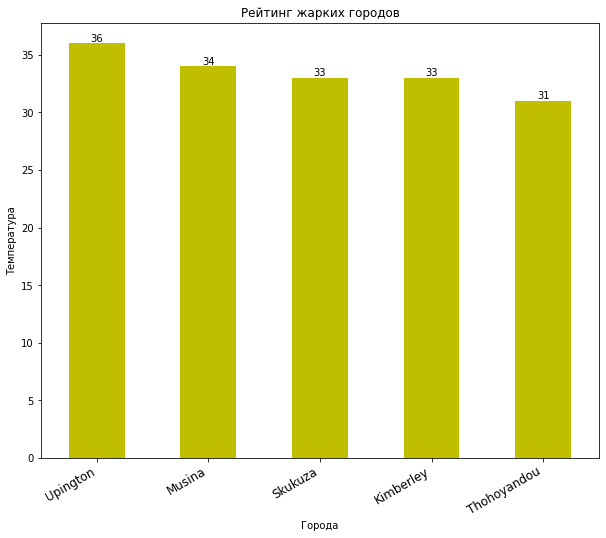

In [68]:
plt.figure(figsize=(10, 8))

ax=df1.sort_values(ascending=False).head(5).plot(kind='bar', color='y')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=12)

ax.set_xlabel('Города')
ax.set_ylabel('Температура')
ax.set_title('Рейтинг жарких городов')

for p in ax.patches:
    ax.annotate(p.get_height().round(2), (p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='bottom')

In [70]:
df2 = df.groupby('City')['Winter(min)'].sum()

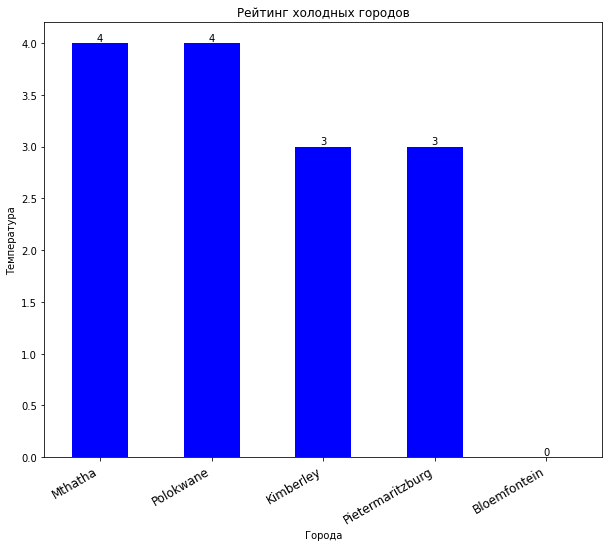

In [73]:
plt.figure(figsize=(10, 8))

ax=df2.sort_values(ascending=False).tail(5).plot(kind='bar', color='b')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=12)

ax.set_xlabel('Города')
ax.set_ylabel('Температура')
ax.set_title('Рейтинг холодных городов')

for p in ax.patches:
    ax.annotate(p.get_height().round(2), (p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='bottom')

# **Задание 2**

Недельная заработная плата десяти сотрудников (с инициалами A – J) составляет: 100, 120, 80, 155, 222, 400, 199, 403, 345, 290. Сохраните недельную заработную плату в DataFrame.

• Постройте гистограмму для отображения заработной платы в убывающем порядке.

• Обозначьте каждую полосу на гистограммах с помощью метода аннотации.

In [21]:
df = pd.DataFrame({
    'Name': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'Salary': [100, 120, 80, 155, 222, 400, 199, 403, 345, 290]
})

df1 = df.groupby('Name')['Salary'].sum()

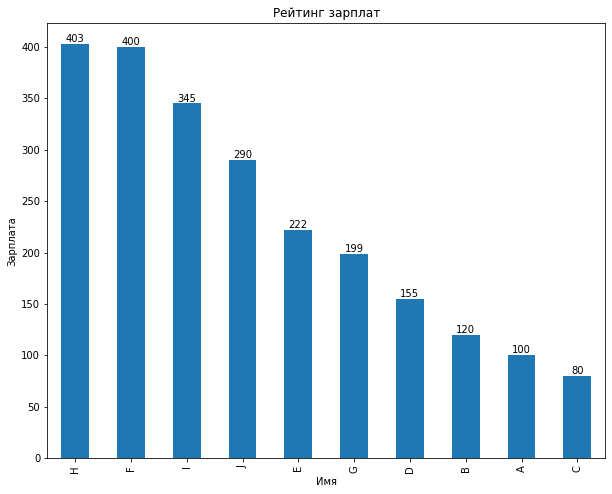

In [23]:
plt.figure(figsize=(10, 8))

ax=df1.sort_values(ascending=False).plot(kind='bar')

ax.set_xlabel('Имя')
ax.set_ylabel('Зарплата')
ax.set_title('Рейтинг зарплат')

for p in ax.patches:
    ax.annotate(p.get_height().round(2), (p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='bottom')